In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1.

In [131]:
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [132]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2.

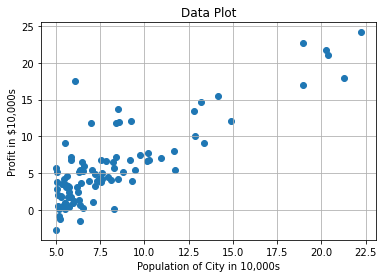

In [133]:
x = data.values[:, 0]
y = data.values[:, 1]


plt.scatter(x, y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Data Plot")
plt.grid()

Ex. 3./4.

In [134]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y_shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

Ex. 5./6.

In [135]:
def h(X, theta):
    return theta.T @ X

def computeCost(X, y, theta):
    m = y.shape[0]
    diff = (h(X, theta) - y)**2
    return 1 / (2*m) * diff.sum()

Ex. 7.

In [136]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    m = X.shape[1]
    for i in range(it):
        theta_temp0 = theta[0, 0] - alpha*(h(X, theta) - y).sum()/m
        theta_temp1 = theta[1, 0] - alpha*(h(X, theta) - y)@X[1, :].T/m
                
        theta[0, 0] = theta_temp0
        theta[1, 0] = theta_temp1
        cost.append(computeCost(X, y, theta))
        
    return theta, cost

EX. 8./9./10.

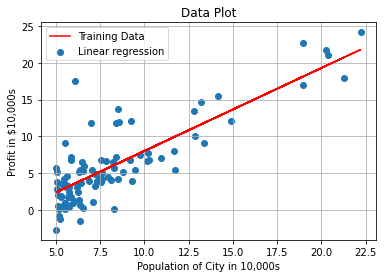

In [137]:
alpha = 0.01
it = 1000
[ab, cost] = simple_gradient(X, y, theta, alpha, it)

plt.figure()
plt.scatter(x, y)
plt.plot(x, ab[1]*x + ab[0], 'r')
plt.legend(["Training Data", "Linear regression"])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Data Plot")
plt.grid()
plt.show()

Ex. 11.

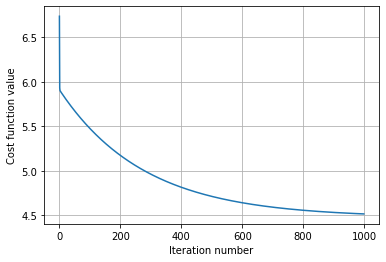

In [138]:
plt.figure()
plt.plot(range(len(cost)), cost)
plt.grid()
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.show()

# ----------------------------------------------

In [139]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Ex. 2.1

In [140]:
x_size_plot = data2.values[:, 0]
x_bedrooms_plot = data2.values[:, 1]
y_plot = data2.values[:, 2]

data2_fn = data2-data2.mean()
data2_fn = data2_fn/data2_fn.std()

Ex. 2.3/4.

In [141]:
X_size = np.stack([np.ones(x_size.shape, dtype=np.float32), x_size], axis=0)
X_bedrooms = np.stack([np.ones(x_bedrooms.shape, dtype=np.float32), x_bedrooms], axis=0)
y_shape = [1, y.shape[0]]
theta = np.zeros((X_size.shape[0], 1), dtype=np.float32)


Ex. 2.5/6.

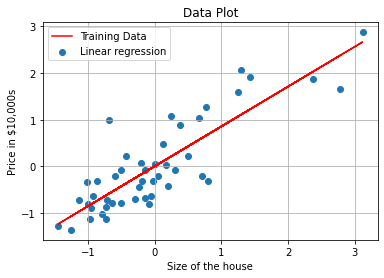

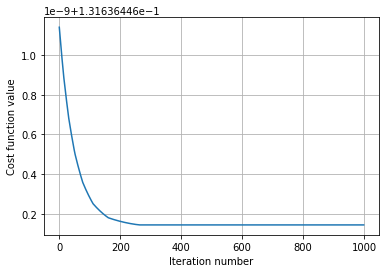

In [143]:
[ab_size, cost_size] = simple_gradient(X_size, y, theta, alpha, it)

plt.figure()
plt.scatter(x_size, y)
plt.plot(x_size, ab_size[1]*x_size + ab_size[0], 'r')
plt.legend(["Training Data", "Linear regression"])
plt.xlabel("Size of the house")
plt.ylabel("Price in $10,000s")
plt.title("Data Plot")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(len(cost_size)), cost_size)
plt.grid()
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.show()

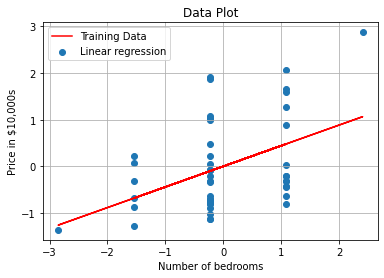

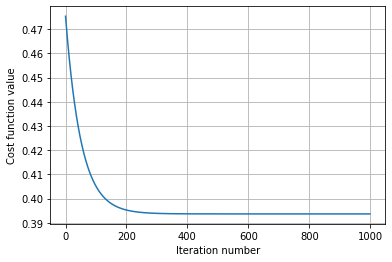

In [144]:
[ab_bedrooms, cost_bedrooms] = simple_gradient(X_bedrooms, y, theta, alpha, it)

plt.figure()
plt.scatter(x_bedrooms, y)
plt.plot(x_bedrooms, ab_bedrooms[1]*x_bedrooms + ab_bedrooms[0], 'r')
plt.legend(["Training Data", "Linear regression"])
plt.xlabel("Number of bedrooms")
plt.ylabel("Price in $10,000s")
plt.title("Data Plot")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(len(cost_bedrooms)), cost_bedrooms)
plt.grid()
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.show()

# ---------------------------------------------------

In [153]:
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Data import
 
 
# Normalization
 
 
# Split into train and test sets (70-30%)
x1 = data2_fn.values[:, 0]
x2 = data2_fn.values[:, 1]
y= data2_fn.values[:, 2] 

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y, test_size = 0.25)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y, test_size = 0.25)

X_train1 = X_train1.reshape(-1, 1)
X_test1 = X_test1.reshape(-1, 1)
y_train1 = y_train1.reshape(-1, 1)
y_test1 = y_test1.reshape(-1, 1)

X_train2 = X_train2.reshape(-1, 1)
X_test2 = X_test2.reshape(-1, 1)
y_train2 = y_train2.reshape(-1, 1)
y_test2 = y_test2.reshape(-1, 1)

# Creating an object 
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
 
# Learning model on training data
regr1.fit(X_train1, y_train1)
regr2.fit(X_train2, y_train2)

# Predicting values using test data
Y_predicted1 = regr1.predict(X_test1)
Y_predicted2 = regr2.predict(X_test2)
 
# Regression coefficients (theta)
print('Coefficients 1: \n', regr1.coef_)
print('Coefficients 2: \n', regr2.coef_)
 
#  Residual sum of squares error
error1 = np.mean((regr1.predict(X_test1) - y_test1) ** 2)
print("Residual sum of squares 1: {}".format(error1))

error2 = np.mean((regr2.predict(X_test2) - y_test2) ** 2)
print("Residual sum of squares 2: {}".format(error2))

Coefficients 1: 
 [[0.84403943]]
Coefficients 2: 
 [[0.50363118]]
Residual sum of squares 1: 0.23997623634092782
Residual sum of squares 2: 0.7396006615056292


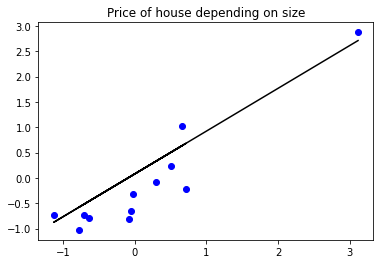

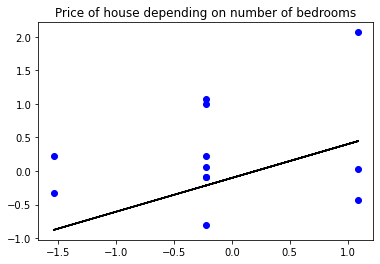

In [155]:
y_pred1 = regr1.predict(X_test1)
y_pred2 = regr2.predict(X_test2)

plt.figure()
plt.scatter(X_test1, y_test1, color ='b')
plt.plot(X_test1, y_pred1, color ='k')
plt.title("Price of house depending on size")
plt.show()

plt.figure()
plt.scatter(X_test2, y_test2, color ='b')
plt.plot(X_test2, y_pred2, color ='k')
plt.title("Price of house depending on number of bedrooms")
plt.show()